In [2]:
import json 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize, StandardScaler

# Get digital ink for firestore db

In [2]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
import glob

json_file = glob.glob("*.json")[0]

cred = credentials.Certificate(json_file)
firebase_admin.initialize_app(cred, {
    'projectId': 'digital-pen-746a6',
})

db = firestore.client()
doc_id = "THJc0rm2wzZaiNwFhcTa"
doc_ref = db.collection("ink").document(doc_id)

doc = doc_ref.get()

filename = "../data/uploaded_ink/" + doc_id + ".json"

if doc.exists:
    ink = doc.to_dict()
    with open(filename, 'w') as fp:
        json.dump(ink, fp)
else:
    print(u'No such document!')

# Visualise Ink

In [8]:
with open("../data/uploaded_ink/L1l3xQZg4erNtCnqpgDX.json") as f:
    ink = json.load(f)

# Kmeans Clustering

In [9]:
X = np.swapaxes(np.array([ink["x"], ink["y"], ink["t"]]), 0 , 1) 

scaler = StandardScaler().fit(X)

X_norm = normalize(X, axis=0)
X_scaled = scaler.transform(X)

In [10]:
kmeans = KMeans(n_clusters=18).fit(X_scaled)
labels = kmeans.labels_

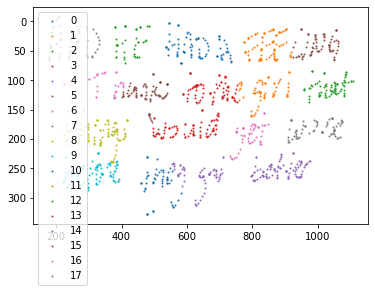

In [11]:
u_labels = np.unique(kmeans.labels_)

for i in u_labels:
    plt.scatter(X[labels == i , 0] , X[labels == i , 1] , label = i, s = 1)
plt.legend()
plt.gca().invert_yaxis()
plt.show()

# DBScan Algorithm

In [8]:
with open("../data/uploaded_ink/dg5A2HQQudmaSH0b01Jh.json") as f:
    ink = json.load(f)

X = np.swapaxes(np.array([ink["x"], ink["y"], ink["t"]]), 0 , 1)

scaler = StandardScaler().fit(X)

X_norm = normalize(X, axis=0)
X_scaled = scaler.transform(X)

In [9]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.8, min_samples=5).fit(X_scaled)
labels = clustering.labels_

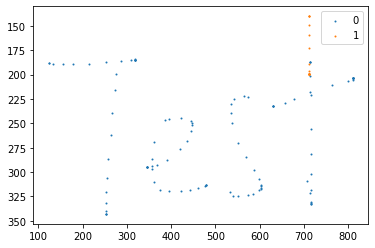

In [10]:
u_labels = np.unique(clustering.labels_)

for i in u_labels:
    plt.scatter(X[labels == i , 0] , X[labels == i , 1] , label = i, s = 1)
plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [4]:
with open("../data/uploaded_ink/KYNjJdlpGzGXUi65FblX.json") as f:
    ink = json.load(f)

X = np.swapaxes(np.array([ink["x"], ink["y"], ink["t"]]), 0 , 1)

scaler = StandardScaler().fit(X)

X_norm = normalize(X, axis=0)
X_scaled = scaler.transform(X)

In [1]:
print(np.min(X_norm[:,0]))
print(np.max(X_norm[:,0]))

NameError: name 'np' is not defined

In [6]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.3, min_samples=5).fit(X_scaled)
labels = clustering.labels_

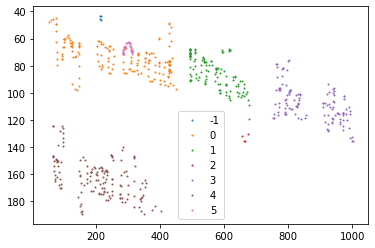

In [111]:
u_labels = np.unique(clustering.labels_)

for i in u_labels:
    plt.scatter(X[labels == i , 0] , X[labels == i , 1] , label = i, s = 1)
plt.legend()
plt.gca().invert_yaxis()
plt.show()